Binary Classification Approach to Predict IPL Winner

In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error



In [309]:
import pandas as pd
ml_rashmi = pd.read_csv("aggregated_match_data_by_innings_wo_small_dataset.csv")
df = ml_rashmi.copy()

In [310]:
df.shape
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       880 non-null    int64  
 1   id               880 non-null    int64  
 2   inning1_runs     880 non-null    int64  
 3   inning1_wickets  880 non-null    int64  
 4   inning1_balls    880 non-null    int64  
 5   inning2_runs     880 non-null    int64  
 6   inning2_wickets  880 non-null    int64  
 7   inning2_balls    880 non-null    int64  
 8   season           880 non-null    int64  
 9   city             880 non-null    object 
 10  venue            880 non-null    object 
 11  toss_winner      880 non-null    object 
 12  toss_decision    880 non-null    object 
 13  team1            880 non-null    object 
 14  team2            880 non-null    object 
 15  winner           880 non-null    object 
 16  result           880 non-null    object 
 17  result_margin   

In [311]:
# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0', 'id', 'result', 'result_margin', 'player_of_match']
df.drop(columns=columns_to_drop, inplace=True)

In [312]:
# Create binary target: 1 if team1 wins, else 0
df['winner_binary'] = (df['winner'] == df['team1']).astype(int)



In [313]:
print(f"Shape of target (y): {y.shape}")
print("-" * 30)

Shape of target (y): (880,)
------------------------------


In [317]:
# Select features
features = ['team1', 'team2', 'city', 'venue', 'toss_winner', 'toss_decision',
            'inning1_runs', 'season', 'umpire1', 'umpire2', 'inning1_balls', 'inning1_wickets']
X = df[features].copy()
y = df['winner_binary']


In [319]:
# Label Encoding for categorical features
cat_features = ['team1', 'team2', 'city', 'venue', 'toss_winner', 'toss_decision', 'umpire1', 'umpire2']
num_features = ['inning1_runs', 'season', 'inning1_balls', 'inning1_wickets']

encoders = {}
for col in cat_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le
  
# Print encoded features
print("\nEncoded features (first 5 rows):")
print(X.head())




Encoded features (first 5 rows):
   team1  team2  city  venue  toss_winner  toss_decision  inning1_runs  \
0      0      4     2     15            0              1           222   
1      6      1     7     24            1              0           240   
2      2      7    10     10            7              0           129   
3      5      0    23     35            5              0           165   
4      4      3    21      9            3              0           110   

   season  umpire1  umpire2  inning1_balls  inning1_wickets  
0    2008        9       41            124                3  
1    2008       34       52            124                5  
2    2008        8       15            122                8  
3    2008       51       14            123                7  
4    2008       10       24            118               10  


In [320]:
# Scale numerical features
scaler = StandardScaler()
X[num_features] = scaler.fit_transform(X[num_features])


In [321]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [322]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

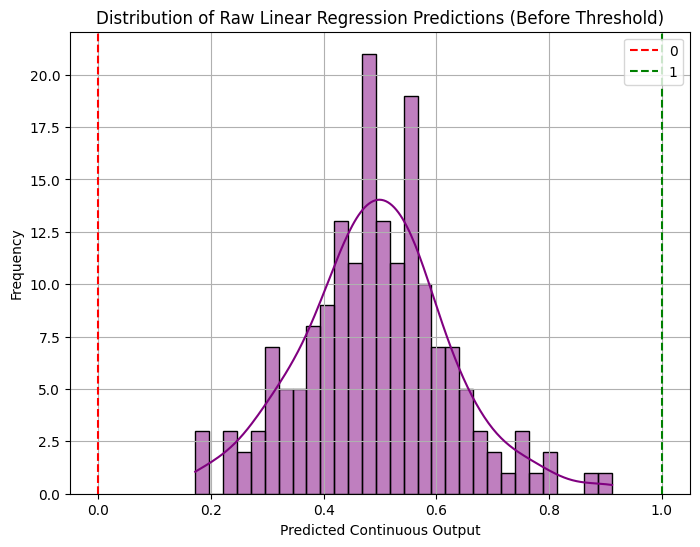

In [353]:
# Plot prediction distribution before thresholding
plt.figure(figsize=(8,6))
sns.histplot(y_pred_continuous, bins=30, kde=True, color='purple')
plt.title("Distribution of Raw Linear Regression Predictions (Before Threshold)")
plt.xlabel("Predicted Continuous Output")
plt.ylabel("Frequency")
plt.axvline(x=0, color='red', linestyle='--', label='0')
plt.axvline(x=1, color='green', linestyle='--', label='1')
plt.legend()
plt.grid()
plt.show()

In [354]:
# Predictions
y_pred_continuous = model.predict(X_test)
y_pred_binary = (y_pred_continuous >= 0.5).astype(int)

In [356]:
# Train predictions
y_pred_train_continuous = model.predict(X_train)

# Test predictions (already calculated as y_pred_continuous)
# y_pred_continuous = model.predict(X_test)

# Training metrics
mae_train = mean_absolute_error(y_train, y_pred_train_continuous)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train_continuous))

# Testing metrics
mae_test = mean_absolute_error(y_test, y_pred_continuous)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_continuous))

# Print metrics
print("\n--- Regression Evaluation ---")
print(f"Train MAE: {mae_train:.4f}, Train RMSE: {rmse_train:.4f}")
print(f"Test MAE: {mae_test:.4f}, Test RMSE: {rmse_test:.4f}")

# Custom MAE Degree Evaluation for multiple degrees
for degree in [2, 3, 4, 5]:
    custom_train_error = np.mean(np.abs(y_train - y_pred_train_continuous)**degree)**(1/degree)
    custom_test_error = np.mean(np.abs(y_test - y_pred_continuous)**degree)**(1/degree)
    print(f"The MAE for Degree-{degree} (Train): {custom_train_error:.4f}")
    print(f"The MAE for Degree-{degree} (Test): {custom_test_error:.4f}")




--- Regression Evaluation ---
Train MAE: 0.4745, Train RMSE: 0.4871
Test MAE: 0.4706, Test RMSE: 0.4874
The MAE for Degree-2 (Train): 0.4871
The MAE for Degree-2 (Test): 0.4874
The MAE for Degree-3 (Train): 0.4985
The MAE for Degree-3 (Test): 0.5027
The MAE for Degree-4 (Train): 0.5091
The MAE for Degree-4 (Test): 0.5172
The MAE for Degree-5 (Train): 0.5188
The MAE for Degree-5 (Test): 0.5312


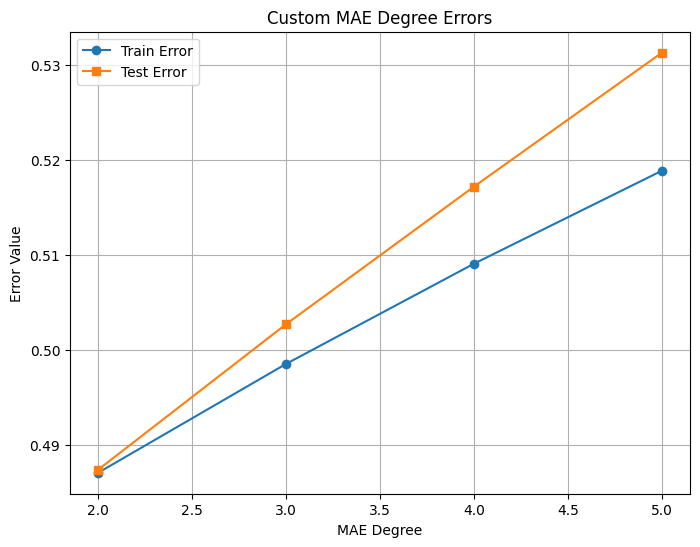

In [357]:
degrees = [2, 3, 4, 5]
train_errors = []
test_errors = []

for degree in degrees:
    custom_train_error = np.mean(np.abs(y_train - y_pred_train_continuous)**degree)**(1/degree)
    custom_test_error = np.mean(np.abs(y_test - y_pred_continuous)**degree)**(1/degree)
    train_errors.append(custom_train_error)
    test_errors.append(custom_test_error)

# Plotting the custom MAE degree errors
plt.figure(figsize=(8,6))
plt.plot(degrees, train_errors, marker='o', label='Train Error')
plt.plot(degrees, test_errors, marker='s', label='Test Error')
plt.title("Custom MAE Degree Errors")
plt.xlabel("MAE Degree")
plt.ylabel("Error Value")
plt.legend()
plt.grid()
plt.show()

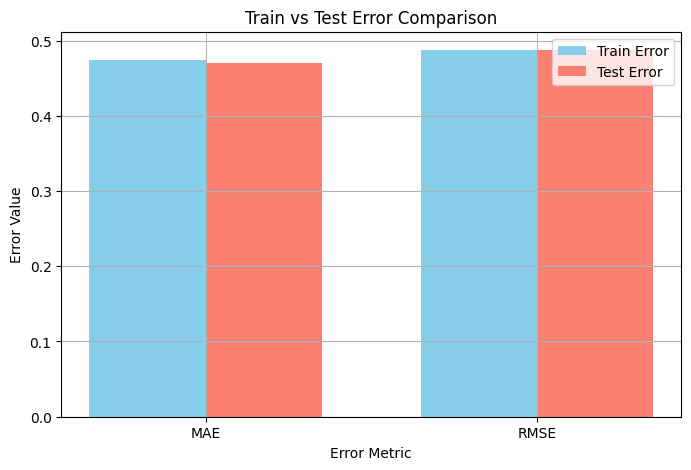

In [346]:
# Plot train vs test error
plt.figure(figsize=(8, 5))
errors = ['MAE', 'RMSE']
train_errors = [mae_train, rmse_train]
test_errors = [mae_test, rmse_test]
bar_width = 0.35
index = np.arange(len(errors))

plt.bar(index, train_errors, bar_width, label='Train Error', color='skyblue')
plt.bar(index + bar_width, test_errors, bar_width, label='Test Error', color='salmon')
plt.xlabel('Error Metric')
plt.ylabel('Error Value')
plt.title('Train vs Test Error Comparison')
plt.xticks(index + bar_width / 2, errors)
plt.legend()
plt.grid()
plt.show()

In [325]:
# Classification Evaluation
acc = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", acc)
print("Classification Report:\n", classification_report(y_test, y_pred_binary))


Accuracy: 0.5568181818181818
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.59      0.56        85
           1       0.58      0.53      0.55        91

    accuracy                           0.56       176
   macro avg       0.56      0.56      0.56       176
weighted avg       0.56      0.56      0.56       176



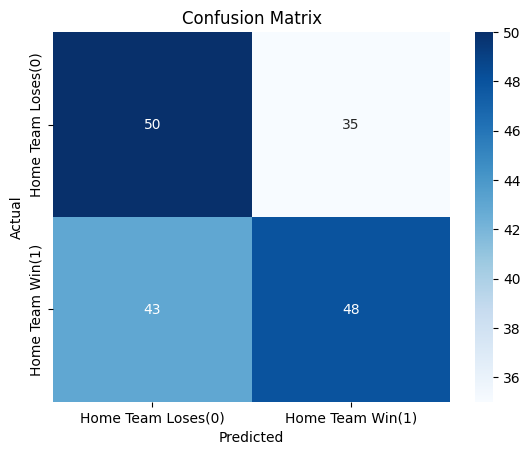

In [339]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Home Team Loses(0)','Home Team Win(1)'], yticklabels=['Home Team Loses(0)','Home Team Win(1)'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [327]:
print(df['winner_binary'].value_counts())


1    454
0    426
Name: winner_binary, dtype: int64


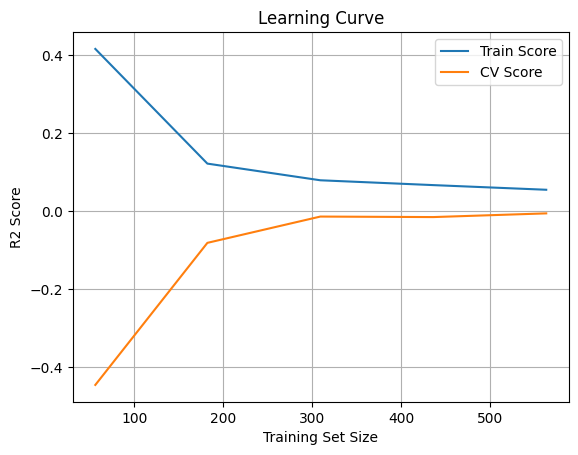

In [328]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 5))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='CV Score')
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("R2 Score")
plt.legend()
plt.grid()
plt.show()


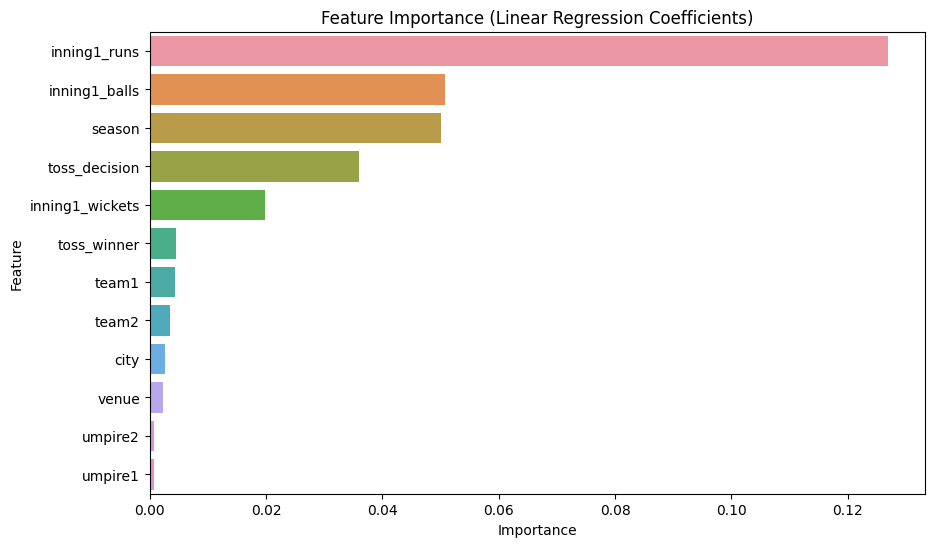

In [329]:
# Feature Importance
importances = np.abs(model.coef_)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()


Hyper Parameter Tuning for Binary Classification

In [330]:
# Hyperparameter tuning for fit_intercept
param_grid = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'fit_intercept': True}


In [ ]:
# Train model with best parameters 
best_model = LinearRegression(**grid_search.best_params_)
best_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predictions 
y_pred_continuous_best = best_model.predict(X_test)
y_pred_binary_best = (y_pred_continuous_best >= 0.5).astype(int)

In [358]:
y_pred_train_continuous_best = best_model.predict(X_train)

# Regression Evaluation (After Tuning for both Train and Test)
mae_train_best = mean_absolute_error(y_train, y_pred_train_continuous_best)
rmse_train_best = np.sqrt(mean_squared_error(y_train, y_pred_train_continuous_best))

mae_test_best = mean_absolute_error(y_test, y_pred_continuous_best)
rmse_test_best = np.sqrt(mean_squared_error(y_test, y_pred_continuous_best))

print("\n--- Regression Evaluation After Hyperparameter Tuning ---")
print(f"Train MAE: {mae_train_best:.4f}, Train RMSE: {rmse_train_best:.4f}")
print(f"Test MAE: {mae_test_best:.4f}, Test RMSE: {rmse_test_best:.4f}")


--- Regression Evaluation After Hyperparameter Tuning ---
Train MAE: 0.4745, Train RMSE: 0.4871
Test MAE: 0.4706, Test RMSE: 0.4874


In [360]:
# Custom MAE Degree Evaluation after Hyperparameter Tuning
print("\n--- Custom MAE Degree Evaluation (After Tuning) ---")
for degree in [2, 3, 4, 5]:
    custom_train_error_best = np.mean(np.abs(y_train - y_pred_train_continuous_best)**degree)**(1/degree)
    custom_test_error_best = np.mean(np.abs(y_test - y_pred_continuous_best)**degree)**(1/degree)
    print(f"Custom MAE Degree-{degree} (Train): {custom_train_error_best:.4f}")
    print(f"Custom MAE Degree-{degree} (Test): {custom_test_error_best:.4f}")




--- Custom MAE Degree Evaluation (After Tuning) ---
Custom MAE Degree-2 (Train): 0.4871
Custom MAE Degree-2 (Test): 0.4874
Custom MAE Degree-3 (Train): 0.4985
Custom MAE Degree-3 (Test): 0.5027
Custom MAE Degree-4 (Train): 0.5091
Custom MAE Degree-4 (Test): 0.5172
Custom MAE Degree-5 (Train): 0.5188
Custom MAE Degree-5 (Test): 0.5312


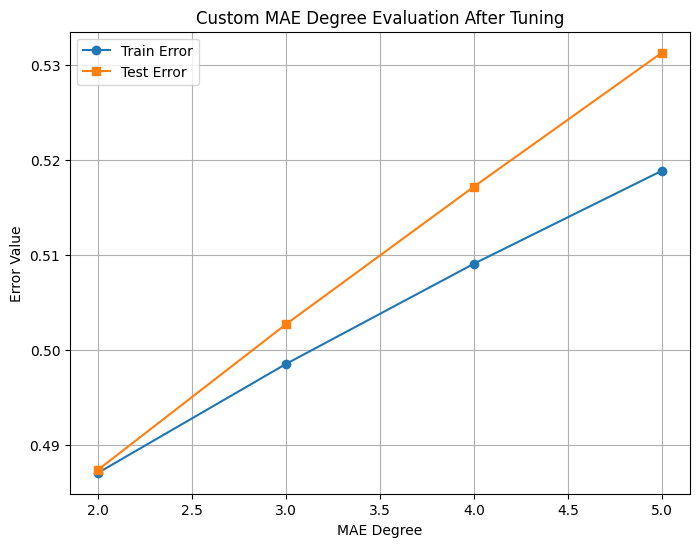

In [362]:
# Plot Custom MAE Degree Evaluation (After Tuning)
train_errors = []
test_errors = []
degrees = [2, 3, 4, 5]

for degree in degrees:
    custom_train_error_best = np.mean(np.abs(y_train - y_pred_train_continuous_best)**degree)**(1/degree)
    custom_test_error_best = np.mean(np.abs(y_test - y_pred_continuous_best)**degree)**(1/degree)
    train_errors.append(custom_train_error_best)
    test_errors.append(custom_test_error_best)

plt.figure(figsize=(8,6))
plt.plot(degrees, train_errors, marker='o', label='Train Error')
plt.plot(degrees, test_errors, marker='s', label='Test Error')
plt.title("Custom MAE Degree Evaluation After Tuning")
plt.xlabel("MAE Degree")
plt.ylabel("Error Value")
plt.legend()
plt.grid()
plt.show()


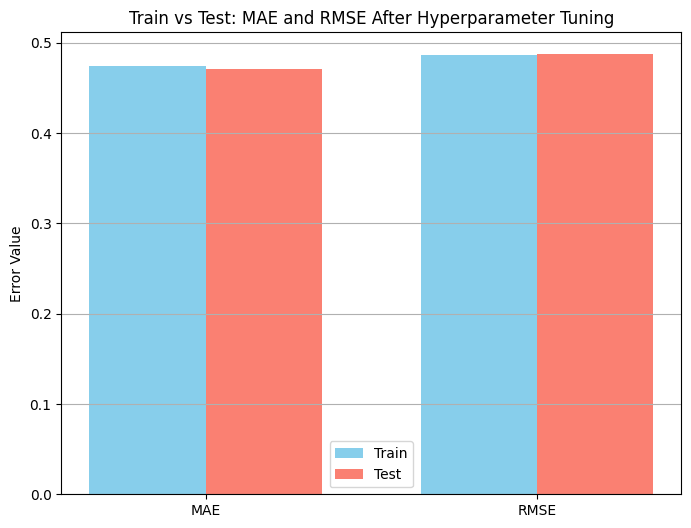

In [364]:
# Combined Plot for Train vs Test for MAE and RMSE After Hyperparameter Tuning
plt.figure(figsize=(8,6))
bar_width = 0.35
index = np.arange(2)

plt.bar(index, [mae_train_best, rmse_train_best], bar_width, label='Train', color='skyblue')
plt.bar(index + bar_width, [mae_test_best, rmse_test_best], bar_width, label='Test', color='salmon')

plt.xticks(index + bar_width / 2, ['MAE', 'RMSE'])
plt.title("Train vs Test: MAE and RMSE After Hyperparameter Tuning")
plt.ylabel("Error Value")
plt.legend()
plt.grid(axis='y')
plt.show()


In [361]:
# Classification Evaluation (After Tuning)
acc_best = accuracy_score(y_test, y_pred_binary_best)
print("Accuracy:", acc_best)
print("Classification Report:\n", classification_report(y_test, y_pred_binary_best))

Accuracy: 0.5568181818181818
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.59      0.56        85
           1       0.58      0.53      0.55        91

    accuracy                           0.56       176
   macro avg       0.56      0.56      0.56       176
weighted avg       0.56      0.56      0.56       176



In [ ]:
# Classification Evaluation 
acc_best = accuracy_score(y_test, y_pred_binary_best)
print("Accuracy:", acc_best)
print("Classification Report:\n", classification_report(y_test, y_pred_binary_best))

Accuracy: 0.5568181818181818
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.59      0.56        85
           1       0.58      0.53      0.55        91

    accuracy                           0.56       176
   macro avg       0.56      0.56      0.56       176
weighted avg       0.56      0.56      0.56       176



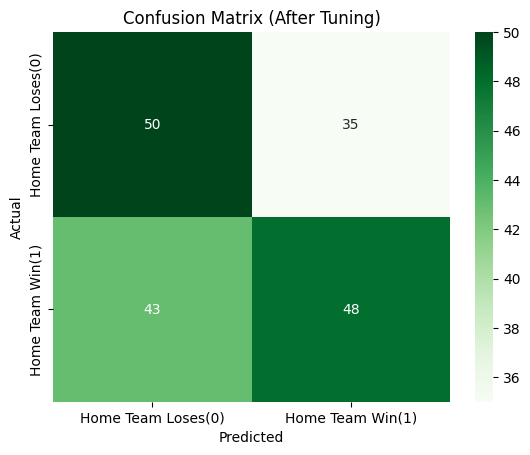

In [ ]:
# Confusion Matrix 
cm_best = confusion_matrix(y_test, y_pred_binary_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Home Team Loses(0)','Home Team Win(1)'], yticklabels=['Home Team Loses(0)','Home Team Win(1)'])
plt.title("Confusion Matrix (After Tuning)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


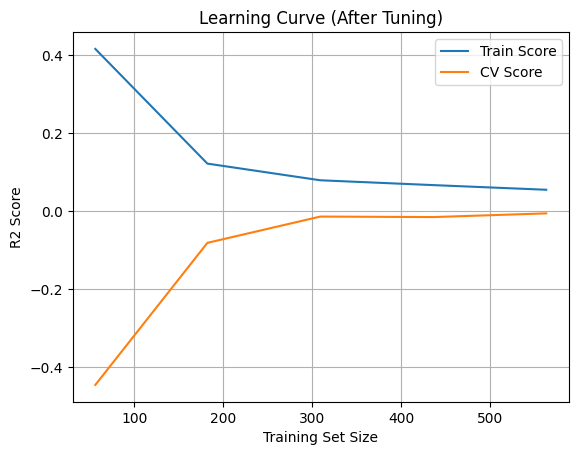

In [ ]:
# Learning Curve 
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 5))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='CV Score')
plt.title("Learning Curve (After Tuning)")
plt.xlabel("Training Set Size")
plt.ylabel("R2 Score")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Feature Importance 
importances = np.abs(best_model.coef_)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

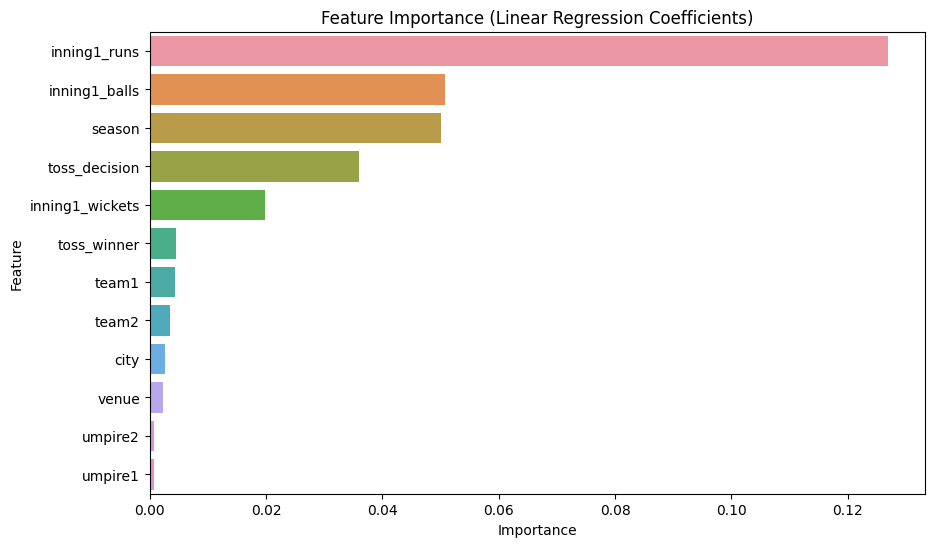

In [338]:
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()
